In [8]:
import numpy as np
from numpy import *
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [9]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    return fig,ax

In [10]:
path = os.path.expanduser('~/Documents/magphys/')

In [11]:
Montague = pd.read_csv(os.path.expanduser(path+'eg_user_files/observations.dat')) 
for i in range(1):
    potato=str(Montague['id'][i])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
galaxy_fit = pd.read_csv(os.path.expanduser(path+'/20366.fit'),index_col=0,on_bad_lines='skip')
galaxy_fit2 = pd.DataFrame(columns=['Full'])
Filters = pd.read_csv(os.path.expanduser(path+'/eg_user_files/filters.dat'))
lambda_c =Filters['$\lambda_c$']
galaxy_fit3 = pd.DataFrame(columns=[])
galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])


TypeError: read_csv() got an unexpected keyword argument 'on_bad_lines'

In [5]:
galaxy_fit

In [6]:
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

In [7]:
short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)
# short2

In [8]:
# Montague

In [9]:
# print(len(Montague['id']))

In [10]:
short2=short2.drop(['Name'],axis=1)

In [11]:
SED = Table.from_pandas(short2)
A=[float(s) for s in SED['A']]
B=[float(s) for s in SED['B']]
C=[float(s) for s in SED['C']]
#SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms

In [12]:
# a=0
# a2=Montague.iloc[a]['id']
redshift =float(galaxy_fit.index[6].split()[-1])
light=2.998*(10**18) #speed of light in Angstroms ~ A/s
lambda_cA = lambda_c*10000 #central wavelength in Angstroms
x=cosmo.luminosity_distance(redshift)
meters=x*3.0857*10**22 #Mpc to m
dist = meters.value
B = np.array(B)
A = np.array(A)
L_lambda = 10**B #L_0/Angstroms
lambd = 10**A #Angstroms
L_nu=L_lambda*lambd**2/light #L_0
f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
f_nu = f_nu/10**-26
# print(f_nu)

C = np.array(C)
L_lambda2=10**C
L_nu2=L_lambda2*lambd**2/light
f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
f_nu2 = f_nu2/10**-26
# print(len(L_nu))

In [13]:
#Scuffed error calculation. yerr/y *0.434 = error for log plot





error=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))
error=[]                                                                           
for i in range(len((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift)))):
    grape=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2][i]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2][i]*(1+redshift))
#     list(error)
#     mylist = list()
    error.append(grape)
#     print()
#     list.append(error)
# error   

                                                                           
                                                                           

/tmp/ipykernel_136858/3941653603.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<ErrorbarContainer object of 3 artists>

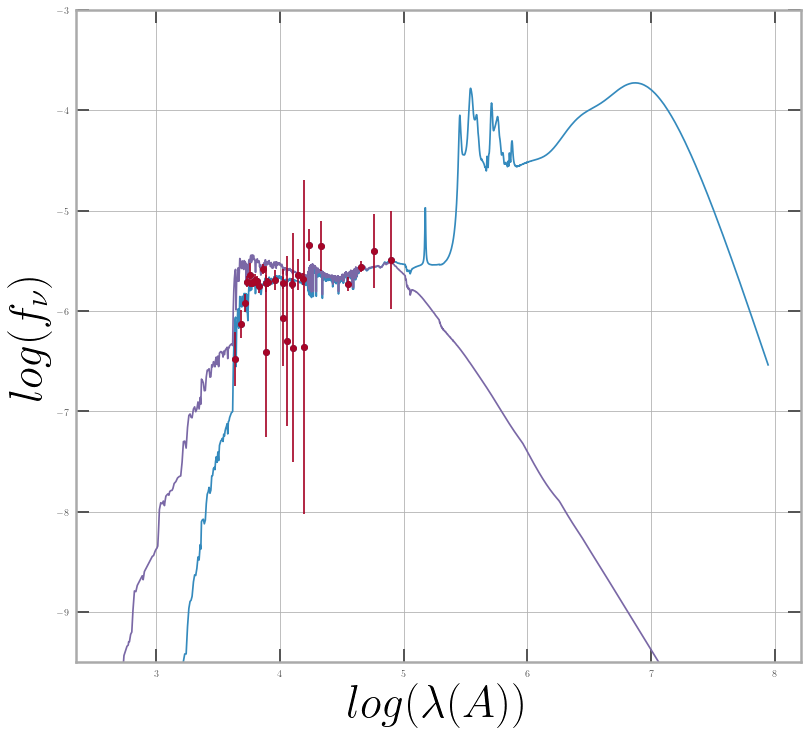

In [14]:
# fig=plt.figure(figsize=(15,8))
# ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
# ax.set_ylabel('$log(f_{\nu})$',fontsize='16')
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylim(bottom=-9.5, top=-3)
fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(f_{\nu})$')
ax.set_ylim(bottom=-9.5, top=-3)
plt.plot(A,log10(f_nu))
plt.plot(A,log10(f_nu2))
plt.scatter(log10(lambda_cA),log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))))
plt.errorbar(x=log10(lambda_cA),y=log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))),yerr=error,fmt='o')

/tmp/ipykernel_136858/3941653603.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<ErrorbarContainer object of 3 artists>

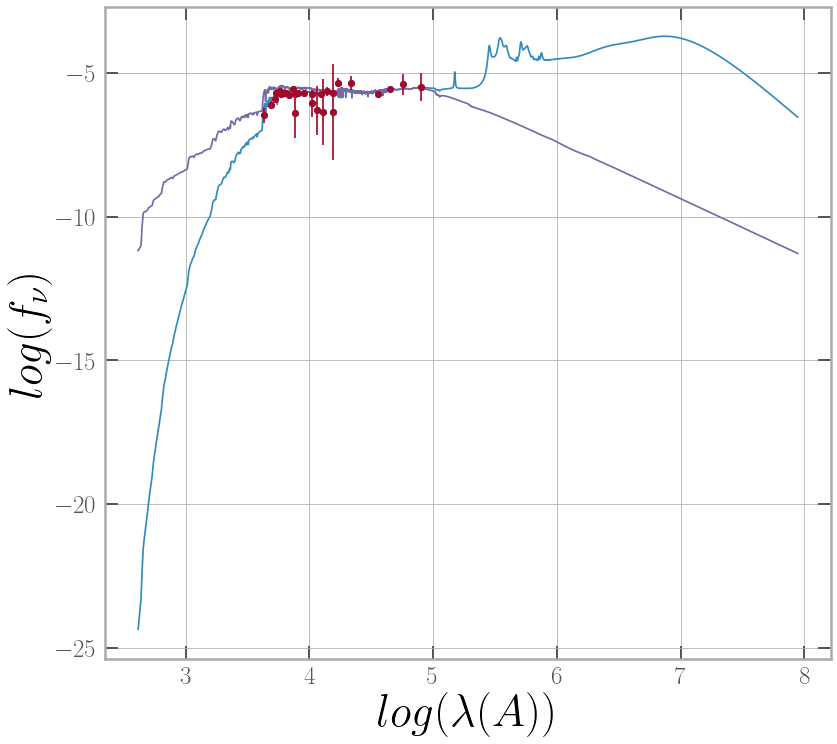

In [15]:
fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(f_{\nu})$')
# ax.set_ylim(bottom=-9.5, top=-3)
plt.plot(A,log10(f_nu))
plt.plot(A,log10(f_nu2))
plt.scatter(log10(lambda_cA),log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))))
plt.errorbar(x=log10(lambda_cA),y=log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))),yerr=error,fmt='o')

In [16]:
# print(len(Montague.iloc[0,0:len(Montague.iloc[0])][::2]))
log10(Montague.iloc[0,2:len(Montague.iloc[0])][::2])

WFI_U38         NaN
U               NaN
B         -7.136950
IA484     -6.786456
IA527     -6.576108
WFI_V     -6.363302
IA574     -6.296758
V         -6.376285
IA624     -6.347024
R         -6.356054
WFI_Rc    -6.359822
IA679     -6.410176
IA738     -6.235750
IA767     -7.061415
I         -6.381604
F814W     -6.370786
Z         -6.348153
F098M           NaN
J1        -6.722662
F105W     -6.375413
J2        -6.956998
F125W     -6.382941
J3        -7.024118
F140W     -6.296129
F160W     -6.340642
Hs        -7.017255
Hl        -6.001765
Ks        -6.009291
IRAC_36   -6.385934
IRAC_45   -6.216717
IRAC_58   -6.062071
IRAC_80   -6.145168
Name: 0, dtype: float64

In [17]:
# SED
((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))

WFI_U38*    6.679406e-07
U*          6.575734e-08
B*          2.064281e-07
IA484*      2.396855e-07
IA527*      2.507763e-07
WFI_V*      2.432823e-07
IA574*      6.356327e-07
V*          1.872541e-07
IA624*      2.826513e-07
R*          9.979558e-08
WFI_Rc*     2.175792e-07
IA679*      2.799013e-07
IA738*      3.040044e-07
IA767*      7.727867e-07
I*          3.517285e-07
F814W*      1.921063e-07
Z*          4.674896e-07
F098M*     -4.485690e-04
J1*         9.564129e-07
F105W*      2.721949e-07
J2*         9.745855e-07
F125W*      2.401094e-07
J3*         1.125917e-06
F140W*      8.117357e-07
F160W*      2.849528e-07
Hs*         1.671583e-06
Hl*         1.669172e-06
Ks*         2.527905e-06
IRAC_36*    3.109592e-07
IRAC_45*    3.435638e-07
IRAC_58*    3.352195e-06
IRAC_80*    3.655914e-06
Name: 0, dtype: float64

In [18]:
# Montague.iloc[0,2:len(Montague.iloc[0])]

In [19]:
# Montague.iloc[0,2:len(Montague.iloc[0])][::2]

In [20]:
for i in range(len(galaxy_fit)):
    line = galaxy_fit.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=32:
        continue
    str_line = " ".join(str(item) for item in line)
    galaxy_fit2.loc[i]=str(str_line)

    
names = []
for i in range(len(Filters['Name'])):
      names.append(Filters.iloc[i,0])
names
galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
# galaxy_fit2

In [21]:
# galaxy_fit2[]

In [22]:
# Filters

In [23]:
test=Table.from_pandas(galaxy_fit2)
L_nu=[float(s) for s in test[0]] #First row.
L_nu_err=[float(s) for s in test[1]] #Second row
L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
L_nu_err=np.array(L_nu_err)

L_nu_err=L_nu_err#*(1+redshift)
lL_lambda_err=L_nu_err*light/lambda_cA


L_nu = L_nu*(1+redshift)

L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

yerrz=0.434*(lL_lambda_err)/lL_lambda
lL_lambda=lL_lambda.tolist()
for i in range(len(lL_lambda)):
    if lL_lambda[i]<0:
        lL_lambda[i]=1
for i in range(len(lL_lambda)):
        if log10(yerrz[i]) > log10(lL_lambda[i]):
            yerrz[i] = 0.0        
print(log10(yerrz))
print(log10(lL_lambda))

0         -inf
1         -inf
2    -1.223113
3    -1.508652
4    -1.699470
5    -1.925454
6    -1.574882
7    -2.026279
8    -1.876628
9    -2.319734
10   -1.977490
11   -1.817683
12   -1.956277
13   -0.725396
14   -1.747078
15   -2.020562
16   -1.656932
17   -2.319734
18   -0.971663
19   -1.864553
20   -0.729084
21   -1.911524
22   -0.599393
23   -1.469206
24   -1.879446
25   -0.434569
26   -1.450637
27   -1.262870
28   -1.796280
29   -1.922141
30   -1.087477
31   -0.966715
Name: $\lambda_c$, dtype: float64
[ 4.55467246  3.54052109 10.18042953 10.48057412 10.65565662 10.85893246
 10.89521238 10.80419681 10.81107814 10.78753196 10.78035805 10.71109377
 10.85008549 10.00589488 10.68499741 10.67571317 10.64848788  0.
 10.20709509 10.5541801   9.93696402 10.47376404  9.82128031 10.51274801
 10.42461692  9.74382608 10.71996189 10.61018727 10.01572387 10.08254791
 10.13128351  9.9090246 ]


/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
# x=cosmo.luminosity_distance(3.531)
# meters=x*3.0857*10**22 #Mpc to m
# meters = meters.value
# print((meters))

In [25]:
# import numpy as np
arr = np.array(A) #log(A) from SED file
arr2 = 10**(arr) #Angstroms (A)
wavelengths = arr2.tolist() #A
Qlog=log10(wavelengths) #log(A)
Atten = np.array(B) #log(L_o/A)
D = (10**Atten)*wavelengths #L_o/A *A = L_o


# D_nu = D*(arr2**2)/light#(lambda^2)/c * L_lambda
# print(D_nu)
# print(X)
# Flux_at = (D_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
# Flux_at=Flux_at/10**(-26) #Janksys
# Flux_at = Flux_at.value.tolist()
# print(Flux_at)

D=D.tolist()
# D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
Unatten = np.array(C)
E = (10**Unatten)*wavelengths  

# E_nu = E*(arr2**2)/light
# Flux_un = (E_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
# Flux_un = Flux_un/10**(-26) #Janksys
# Flux_un = Flux_un.value.tolist()

E=E.tolist()     #*10000) #^
Atten_log=log10(D) #log(L_o)
Unatten_log=log10(E)
z=log10(lL_lambda) #log(L_o)
t=log10(lambda_cA) #log(A)
# Flux_at_log = log10(Flux_at) #log Janskys
# Flux_un_log = log10(Flux_un) #log Janskys
# print(Flux_at_log)
# print(Atten_log)

(-1.2, 1.2)

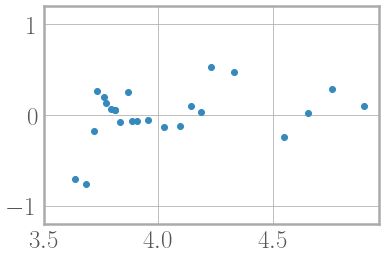

In [26]:
L_obs =[float(s) for s in test[2]]#Third Row
L_obs =np.array(L_obs)
Res = (L_nu - L_obs*(1+redshift))/L_nu
fig,ax=plt.subplots()
plt.scatter(t,Res)
ax.set_ylim(-1.2,1.2)

In [27]:
# plt.plot(Qlog,Flux_at_log)
# plt.plot(Qlog,Flux_un_log)
# # plt.scatter(t,f_nuu_log)
# plt.scatter(t,log10(Montague.iloc[0,2:len(Montague.iloc[0])][::2]))

In [28]:
# df = pd.DataFrame(list(zip(Qlog, Atten_log, Unatten_log)),
#                columns =['log($\lambda$)','log($L_{at}$)', 'log($L_{un}$)'])
# df
# df2 = pd.DataFrame(list(zip(t, z)),
#                columns =[ 'log($\lambda$)','log$\lambda L_\lambda$'])
# df2
# Flux= pd.DataFrame(columns=[])
# for i in range(len(df2)):
#     Flux=pd.concat([Flux,df.iloc[(df['log($\lambda$)']-df2.iloc[i,0]).abs().argsort()[:1]]],axis=0)
# Flux
# Fluxar = np.array(df2['log$\lambda L_\lambda$'])
# Fluxar2 = np.array(Flux['log($L_{at}$)'])
# potato = (Fluxar-Fluxar2)/Fluxar
# potato
# fig, ax = plt.subplots()
# plt.scatter(t,potato)
# ax.set_ylim(-0.1,0.1)
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylabel('Residual',fontsize='16')
#Don't forget to get rid of the exactly 0 value. This is a non reading.

In [29]:
Res[2:]

array([-0.70618771, -0.76274328, -0.1826484 ,  0.26573427,  0.20012001,
        0.129683  ,  0.06837319,  0.05983494,  0.05272286, -0.07284768,
        0.25599583, -4.27307625, -0.06418673, -0.06189968, -0.05437352,
        1.32525253, -1.4984    , -0.13304567, -3.21045411, -0.11891694,
       -3.88230584,  0.1033553 ,  0.03551278, -3.56494325,  0.5269962 ,
        0.47059734, -0.24640884,  0.02370259,  0.28766166,  0.09521794])

/tmp/ipykernel_136858/3941653603.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


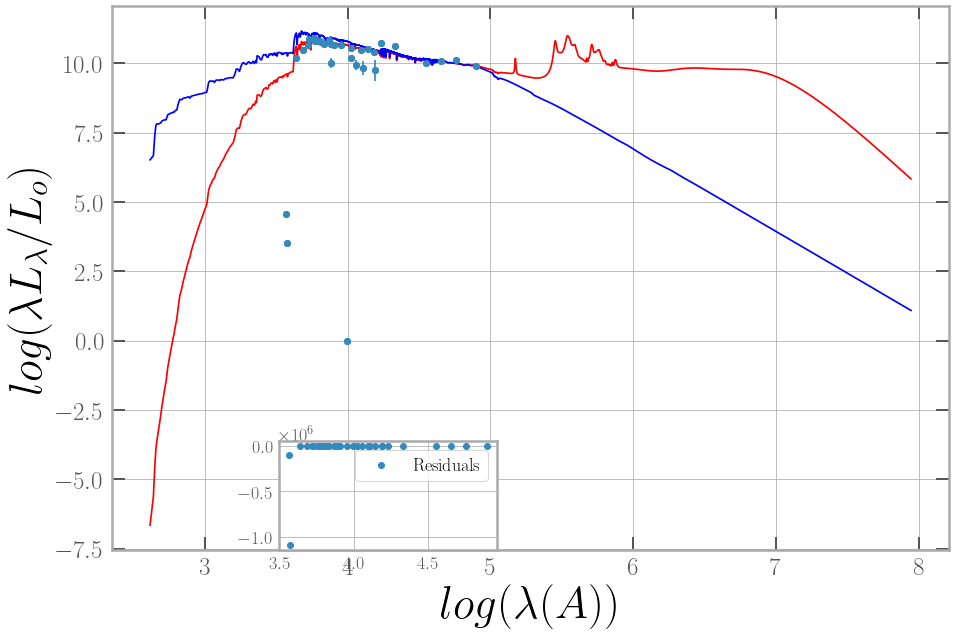

In [30]:
fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(\lambda L_\lambda /L_o )$', size_x=15,size_y=10)
# ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
# ax.set_ylabel('$log(\lambda L_\lambda /L_o )$',fontsize='16')
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylim(bottom=7.5, top=11.5)
plt.rcParams['font.size'] = '18'
plt.plot(Qlog,Atten_log,label='Attenuated',c='red')
plt.plot(Qlog,Unatten_log,label='Unattenuated',c='blue')
plt.scatter(t,z,label='*$\lambda$')
plt.errorbar(t,z,yerr=yerrz,fmt='o')
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.2,0.,0.26,0.2])
ax2.set_axes_locator(ip)
plt.scatter(t,Res,label='Residuals')
plt.legend()

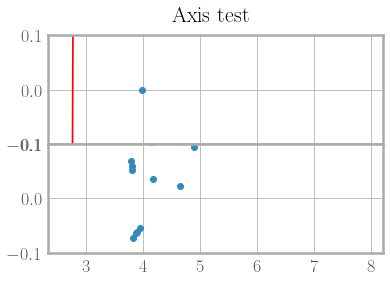

In [31]:
fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Axis test')
axs[0].plot(Qlog,Atten_log,label='Attenuated',c='red')
axs[0].plot(Qlog,Unatten_log,label='Unattenuated',c='blue')
axs[0].scatter(t,z,label='*$\lambda$')
axs[0].set_ylim(bottom=7.5, top=12)
axs[1].scatter(t,Res,label='Residuals')
axs[1].set_ylim(bottom=-0.1, top=0.1)

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

(-0.1, 0.1)

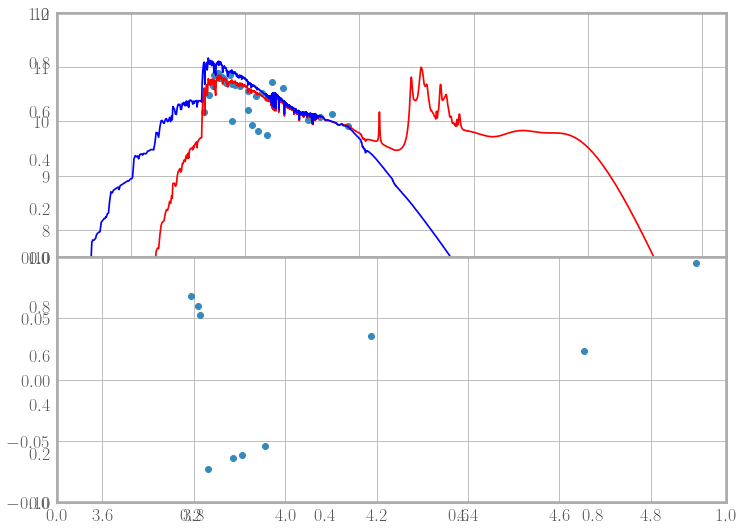

In [32]:
# fig, ax = plt.subplots()
# plt.scatter(t,potato)
# ax.set_ylim(-0.1,0.1)
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylabel('Residual',fontsize='16')

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs = fig.add_subplot(211)
axs.plot(Qlog,Atten_log,label='Attenuated',c='red')
axs.plot(Qlog,Unatten_log,label='Unattenuated',c='blue')
axs.scatter(t,z,label='*$\lambda$')
axs.set_ylim(bottom=7.5, top=12)

pt2 = fig.add_subplot(212)
pt2.scatter(t,Res)
pt2.set_ylim(bottom=-0.1, top=0.1)


In [33]:
##Flux = L/4*pi*d^2*(1+z), D and E are unlogged values of Luminosity  
##1 Solar Luminosity = 3.826x10^26 Joules/s ::: So L*3.826 / 4pi*d^2 should be in the right units
##1 Janksy = 10^-26 Joules s-1 m-2          :::
# Velocity = speed of light * redshift
#Distance =Velocity/Hc (2.3x10^-5 Km/s/lyr) This is giving the Hubble distance- need Luminosity distance (D_H = c/Hc)
# F_at = D*3.826/(4*pi*Distance**2)  #Luminosity distance D_L = (1+z)D_M
#Hold on. Says the factor of 1+z would appear in numerator if the expression were for luminosity density per unit 
#wavelength (as opposed to frequency)- so L/etc*(1+z) rather than L(1+z)/etc
# Vel = 2.998*10**5 * 3.531 #km/s
# Hc = 2.3*10**(-5) #km/s/lyr
# distance =Vel/Hc #in lightyears
# Distance = distance*9.461e+15 #to meters
# Flux_at = D*3.826 / 4*pi*(distance)**2
#Read K paper- Luminosity DIstance

In [34]:
# df = pd.DataFrame(list(zip(Qlog, Atten_log, Unatten_log)),
#                columns =['log($\lambda$)','log($L_{at}$)', 'log($L_{un}$)'])
# df
# df2 = pd.DataFrame(list(zip(t, z)),
#                columns =[ 'log($\lambda$)','log$\lambda L_\lambda$'])
# df2
# Flux= pd.DataFrame(columns=[])
# for i in range(len(df2)):
#     Flux=pd.concat([Flux,df.iloc[(df['log($\lambda$)']-df2.iloc[i,0]).abs().argsort()[:1]]],axis=0)
# Flux
# Fluxar = np.array(df2['log$\lambda L_\lambda$'])
# Fluxar2 = np.array(Flux['log($L_{at}$)'])
# potato = (Fluxar-Fluxar2)/Fluxar
# potato
# plt.scatter(t,potato)
# potato = (z-Atten_log)/z 
#Need to create a subset of Atten_log that has corresponding Qlog values to t values. This would mean
#I get the SED fluxes for the wavelengths that are the same as the central wavelengths of the filters for the residuals
# Flux =[]
# for i in range(len(Atten_log)):
#     if Qlog == t
#         Flux =[]

# print(Atten_log)    
#Need to perform the residual using the flux value of the point and the SED. 

In [35]:
# df.iloc[(df['log($\lambda$)']-3.566555).abs().argsort()[:1]]

In [36]:
# df2.iloc[1,0]

In [37]:
# pd.set_option('display.max_rows', None)
# df


In [38]:
# df2#.iloc[1]

In [39]:
# df.iloc[(df['log($\lambda$)']-3.566555).abs().argsort()[:1]]

In [40]:
# short2['A']=short2['A'].astype(float)
# short2['B']=short2['B'].astype(float)
# # y1=short2['B']*10000
# short2['C']=short2['C'].astype(float)
# y2=short2['C']*10000
# a=galaxy_fit2.loc[1]
# b=Filters['$\lambda_c$']
# # ax2=plt.scatter(a,b)
# ax=short2.plot('A','B',c='red',label='Attenuated')
# plt.rcParams['font.size'] = '24'
# plt.scatter(b,y)
# short2.plot('A','C',label='Unattenuated',ax=ax ,c='blue',fontsize='16',xlabel=('$log(\lambda (A))$'),ylabel=('$log(L_\lambda /L_o A^{-1})$'),loglog=False,figsize=(15,8),grid=True)
# plt.savefig('test.png')
# short2.dtypes
#ALREADY LOGGED
###I believe it's in microjanskys Section 3.8 of the ZFourge paper
#Need to go from units given here to um on the x and \lambda L_lambda on y
#After multiplying the y axis by lambda do the conversion to flux in janskys

In [51]:
for i in range(len(galaxy_fit_s)):
    line = galaxy_fit_s.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=1:
#         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
        ok=pd.DataFrame(line)
        galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
        continue
        
    str_line = " ".join(str(item) for item in line)
    galaxy_fit3.loc[i]=str(str_line)


Properties=galaxy_fit3.T
Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
Properties.reset_index(inplace=True,drop=True)
for col in Properties.select_dtypes(['object']):
    Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')
Properties.head(600)
# galaxy_fit3.head(60)
# galaxy_fit3.iloc[:, : 30]
#FIT FILE. 

,A,B,C,D,E
0,0.0250,2.123000e-01,NaN,NaN,NaN
1,0.0750,2.050000e-01,NaN,NaN,NaN
2,0.1250,3.996000e-01,NaN,NaN,NaN
3,0.1750,1.645000e-01,NaN,NaN,NaN
4,0.2250,1.465000e-02,NaN,NaN,NaN
5,0.2750,6.716000e-04,NaN,NaN,NaN
6,0.3250,2.965000e-03,NaN,NaN,NaN
7,0.3750,3.006000e-04,NaN,NaN,NaN
8,0.4250,1.991000e-13,NaN,NaN,NaN
9,0.4750,2.775000e-05,NaN,NaN,NaN


In [49]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [42]:
Properties.iloc[539:601]['A']

539     NaN
540    3.05
541    3.15
542    3.25
543    3.35
       ... 
596    8.65
597    8.75
598    8.85
599    8.95
600     NaN
Name: A, Length: 62, dtype: float64

In [43]:
Properties.head(100)

,A,B,C,D,E
0,0.0250,2.123000e-01,NaN,NaN,NaN
1,0.0750,2.050000e-01,NaN,NaN,NaN
2,0.1250,3.996000e-01,NaN,NaN,NaN
3,0.1750,1.645000e-01,NaN,NaN,NaN
4,0.2250,1.465000e-02,NaN,NaN,NaN
...,...,...,...,...,...
95,3.3125,2.067000e-40,NaN,NaN,NaN
96,3.4375,1.200000e-24,NaN,NaN,NaN
97,3.5625,7.196000e-14,NaN,NaN,NaN
98,3.6875,3.223000e-10,NaN,NaN,NaN


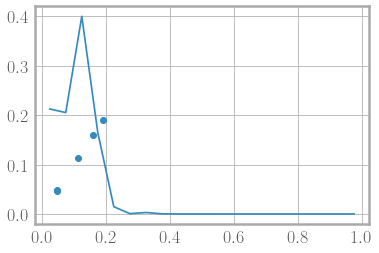

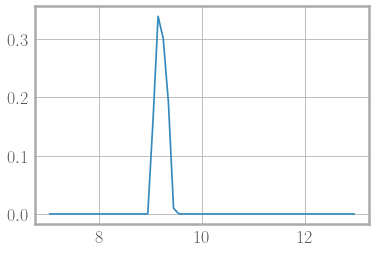

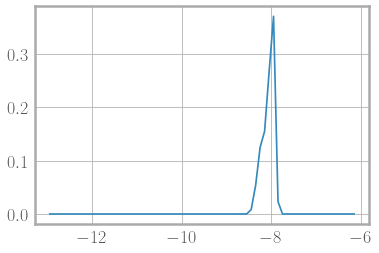

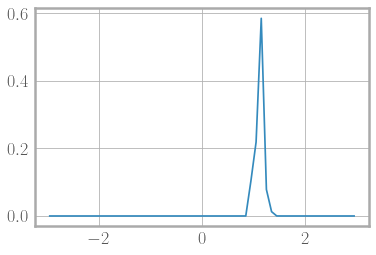

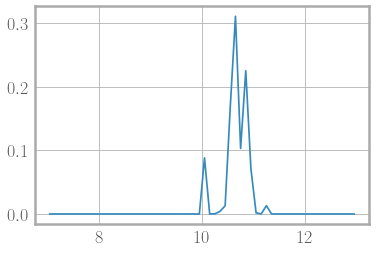

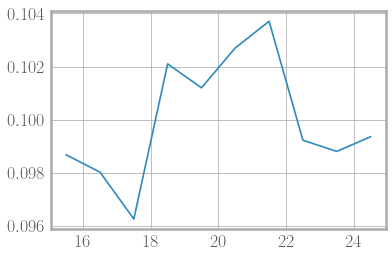

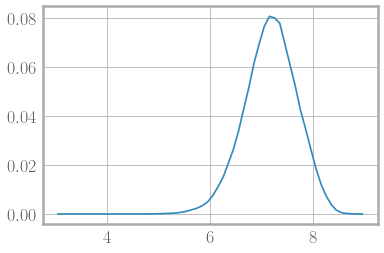

In [44]:
# fig, axs = plt.subplots(1,2)
# fig.suptitle('Vertically stacked subplots')
# axs[0]
# fig,ax=FancyPlot('x','y')
plt.figure(0)
plt.plot(Properties.iloc[0:20]['A'],Properties.iloc[0:20]['B'],label='oops')
plt.scatter(Properties.T[21],Properties.iloc[21],label='oops')
plt.figure(1)
plt.plot(Properties.iloc[193:253]['A'],Properties.iloc[193:253]['B'],label='sSFR')
plt.figure(2)
plt.plot(Properties.iloc[120:189]['A'],Properties.iloc[120:189]['B'],label='Stellar Mass')
plt.figure(3)
plt.plot(Properties.iloc[603:663]['A'],Properties.iloc[603:663]['B'],label='SFR')
plt.figure(4)
plt.plot(Properties.iloc[256:316]['A'],Properties.iloc[256:316]['B'],label='Dust Luminosity')
plt.figure(5)
plt.plot(Properties.iloc[318:329]['A'],Properties.iloc[318:329]['B'],label='Dust Attenuation')
plt.figure(6)
plt.plot(Properties.iloc[540:600]['A'],Properties.iloc[540:600]['B'],label='Dust Mass')
# plt.figure(6)
# fig.tight_layout(pad=3.0) #with specific spacing
# fig.set_figheight(15)
# fig.set_figwidth(15)